<a href="https://colab.research.google.com/github/JavierPachas/diabetes/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Diabetes dataset

Goal: Prediction if a diabetic patient will be readmitted to the hospital within 30 days.


1. Exploratory data analysis (EDA).
2. Feature engineering.
3. Training, validation and testing samples.
4. Modeling

# **1. Exploratory Data Analysis (EDA)**

In [93]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


import pickle
#import warnings
#warnings.filterwarnings('ignore')
#%matplotlib inline

In [5]:
#reading data
url = 'https://raw.githubusercontent.com/JavierPachas/diabetes/main/diabetic_data.csv'
#url2 = 'https://raw.githubusercontent.com/JavierPachas/diabetes/main/IDS_mapping.csv'
diabetes_df = pd.read_csv(url)
#read ids_mapping.csv for description of some variables such admission_type_id and disccharge_disposition_id

In [6]:
diabetes_df.head()
#weight has a question mark

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
diabetes_df.shape

(101766, 50)

In [8]:
diabetes_df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [9]:
diabetes_df.info()
#it indicates that there are no null values in each column, some columns (int64) may have indeed no null values such question marks.
#object type columns should be analyzed for null/invalid values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [10]:
diabetes_df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [11]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


In [12]:
# checking for duplicates
has_duplicates = diabetes_df.duplicated().any()

if has_duplicates:
    print("Duplicates found in the dataframe.")
else:
    print("No duplicates found in the dataframe.")

No duplicates found in the dataframe.


In [13]:
diabetes_df.groupby('readmitted').size()
#11357/101766 = 11.15% of patients are readmitted in less than 30 days
#there are 54K with NO record of readmission

readmitted
<30    11357
>30    35545
NO     54864
dtype: int64

Exploring object type columns

In [14]:
object_column_names = [column for column in diabetes_df.columns if diabetes_df[column].dtype == 'object']
object_column_names

['race',
 'gender',
 'age',
 'weight',
 'payer_code',
 'medical_specialty',
 'diag_1',
 'diag_2',
 'diag_3',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

In [15]:
diabetes_df['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [16]:
diabetes_df['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [17]:
diabetes_df['age'].value_counts()

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

In [18]:
diabetes_df['weight'].value_counts() #almost 98% of patients raws has no weight values!

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

In [19]:
diabetes_df['payer_code'].value_counts()

?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64

In [20]:
diabetes_df['medical_specialty'].value_counts() # ? (50%), InternalMedicine (20%), Emergency/Trauma(10%), Family/GeneralPractice (10%)
#diabetes_df['medical_specialty'].unique()
#diabetes_df['medical_specialty'].nunique() #73
#too disperse data

?                                49949
InternalMedicine                 14635
Emergency/Trauma                  7565
Family/GeneralPractice            7440
Cardiology                        5352
                                 ...  
SportsMedicine                       1
Speech                               1
Perinatology                         1
Neurophysiology                      1
Pediatrics-InfectiousDiseases        1
Name: medical_specialty, Length: 73, dtype: int64

In [21]:
#diabetes_df['diag_1'].value_counts()
#diabetes_df['diag_1'].unique()
#diabetes_df['diag_1'].nunique() #717
#diabetes_df['diag_2'].value_counts()
#diabetes_df['diag_2'].unique()
#diabetes_df['diag_2'].nunique() #749
#diabetes_df['diag_3'].value_counts()
#diabetes_df['diag_3'].unique()
#diabetes_df['diag_3'].nunique() #790
#too disperse data (consider dropping these columns)

In [22]:
diabetes_df['max_glu_serum'].value_counts() #96% none

None    96420
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64

In [23]:
diabetes_df['A1Cresult'].value_counts() #84% none

None    84748
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64

In [24]:
diabetes_df['metformin'].value_counts() #81% No

No        81778
Steady    18346
Up         1067
Down        575
Name: metformin, dtype: int64

In [25]:
diabetes_df['repaglinide'].value_counts() #99% No

No        100227
Steady      1384
Up           110
Down          45
Name: repaglinide, dtype: int64

In [26]:
diabetes_df['nateglinide'].value_counts() #99% No

No        101063
Steady       668
Up            24
Down          11
Name: nateglinide, dtype: int64

In [27]:
diabetes_df['chlorpropamide'].value_counts() #100% drop this column

No        101680
Steady        79
Up             6
Down           1
Name: chlorpropamide, dtype: int64

In [28]:
diabetes_df['glimepiride'].value_counts() #96% No

No        96575
Steady     4670
Up          327
Down        194
Name: glimepiride, dtype: int64

In [29]:
diabetes_df['acetohexamide'].value_counts() #100% drop this column

No        101765
Steady         1
Name: acetohexamide, dtype: int64

In [30]:
diabetes_df['glipizide'].value_counts() #89% no

No        89080
Steady    11356
Up          770
Down        560
Name: glipizide, dtype: int64

In [31]:
diabetes_df['glyburide'].value_counts() #91% no

No        91116
Steady     9274
Up          812
Down        564
Name: glyburide, dtype: int64

In [32]:
diabetes_df['tolbutamide'].value_counts() #100% drop this column

No        101743
Steady        23
Name: tolbutamide, dtype: int64

In [33]:
diabetes_df['pioglitazone'].value_counts() #94% No

No        94438
Steady     6976
Up          234
Down        118
Name: pioglitazone, dtype: int64

In [34]:
diabetes_df['rosiglitazone'].value_counts() #95% No

No        95401
Steady     6100
Up          178
Down         87
Name: rosiglitazone, dtype: int64

In [35]:
diabetes_df['acarbose'].value_counts() #100% drop this column

No        101458
Steady       295
Up            10
Down           3
Name: acarbose, dtype: int64

In [36]:
diabetes_df['miglitol'].value_counts() #100% drop this column

No        101728
Steady        31
Down           5
Up             2
Name: miglitol, dtype: int64

In [37]:
diabetes_df['troglitazone'].value_counts() #100% drop this column

No        101763
Steady         3
Name: troglitazone, dtype: int64

In [38]:
diabetes_df['tolazamide'].value_counts() #100% drop this column

No        101727
Steady        38
Up             1
Name: tolazamide, dtype: int64

In [39]:
diabetes_df['examide'].value_counts() #100% drop this column

No    101766
Name: examide, dtype: int64

In [40]:
diabetes_df['citoglipton'].value_counts() #100% drop this column

No    101766
Name: citoglipton, dtype: int64

In [41]:
diabetes_df['insulin'].value_counts() #47% no

No        47383
Steady    30849
Down      12218
Up        11316
Name: insulin, dtype: int64

In [42]:
diabetes_df['glyburide-metformin'].value_counts() #100% drop this column

No        101060
Steady       692
Up             8
Down           6
Name: glyburide-metformin, dtype: int64

In [43]:
diabetes_df['glipizide-metformin'].value_counts() #100% drop this column

No        101753
Steady        13
Name: glipizide-metformin, dtype: int64

In [44]:
diabetes_df['glimepiride-pioglitazone'].value_counts() #100% drop this column

No        101765
Steady         1
Name: glimepiride-pioglitazone, dtype: int64

In [45]:
diabetes_df['metformin-rosiglitazone'].value_counts() #100% drop this column

No        101764
Steady         2
Name: metformin-rosiglitazone, dtype: int64

In [46]:
diabetes_df['metformin-pioglitazone'].value_counts() #100% drop this column

No        101765
Steady         1
Name: metformin-pioglitazone, dtype: int64

In [47]:
diabetes_df['change'].value_counts() # 54% No

No    54755
Ch    47011
Name: change, dtype: int64

In [48]:
diabetes_df['diabetesMed'].value_counts() # 78% Yes

Yes    78363
No     23403
Name: diabetesMed, dtype: int64

In [49]:
diabetes_df['readmitted'].value_counts() # 54% No

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

As we can see at least 4 columns with question marks:

- 'race', 'weight', 'payer_code', 'medical_specialty'.

Some columns should be dropped regarding their low dispersion:

- 'chlorpropamide', 'acetohexamide', 'tolbutamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone'



In [51]:
columns_to_drop = [
 'chlorpropamide',
 'acetohexamide',
 'tolbutamide',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone'
 ]
diabetes_df.drop(columns=columns_to_drop, axis = 1, inplace = True)
diabetes_df.shape

(101766, 36)

In the IDS_mapping.csv file the word "death" is not found, however hospitals use the word "expired" for patients. Also "hospice" is used to address patients with life expectancy of less than 6 months. Therefore,  rows with discharge_disposition_id in (11, 13, 14, 19, 20, 21) will removed from diabetes_df.

In [52]:
diabetes_df = diabetes_df[~diabetes_df.discharge_disposition_id.isin([11, 13, 14, 19, 20, 21])]

In [53]:
diabetes_df.shape

(99343, 36)

In [54]:
diabetes_df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,nateglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,No,No,No,No,No,Up,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,Steady,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,No,No,No,No,No,Up,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,No,Steady,No,No,No,Steady,Ch,Yes,NO


# **2. Feature Engineering**

In [55]:
#Creating a new label for patients readmitted in less than 30 days
diabetes_df['label']= (diabetes_df.readmitted == '<30').astype('int')

In [56]:
#replacing the question mark (?) for NaN
diabetes_df = diabetes_df.replace('?', np.nan)

Numerical columns

In [57]:
numerical_column_names = [column for column in diabetes_df.columns if diabetes_df[column].dtype == 'int64']
numerical_column_names

['encounter_id',
 'patient_nbr',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'label']

- encounter_id and patient_nbr are identifiers
- admission_type_id, discharge_disposition_id, admission_source_id should categorical.

Then only the following columns will be considered numerical:


In [58]:
#final numerical columns
numerical_column_names = [
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

Categorical columns

In [59]:
#these columns should be not numericals
diabetes_df[['admission_type_id', 'discharge_disposition_id', 'admission_source_id']] = diabetes_df[['admission_type_id', 'discharge_disposition_id', 'admission_source_id']].astype('str')

In [60]:
categorical_column_names = [column for column in diabetes_df.columns if diabetes_df[column].dtype == 'object']
categorical_column_names

['race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'payer_code',
 'medical_specialty',
 'diag_1',
 'diag_2',
 'diag_3',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'glimepiride',
 'glipizide',
 'glyburide',
 'pioglitazone',
 'rosiglitazone',
 'insulin',
 'change',
 'diabetesMed',
 'readmitted']

- 'medical_specialty', 'age' and 'weight' will be analyzed later since there are 73 different specialties and age and weight in this dataset are categorical.
- Given the dispersion of 'diag_1', 'diag_2', 'diag_3' they will be dropped, however the variable number_diagnoses might summarizes the previos three variables.
- 'readmitted' is no longer necessary

The first group of categorical columns will be

In [61]:
cat_columns_1 = ['race',
 'gender',
 'payer_code',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'glimepiride',
 'glipizide',
 'glyburide',
 'pioglitazone',
 'rosiglitazone',
 'insulin',
 'change',
 'diabetesMed']

In [62]:
#dealing with missing data in race, payer_code and medical_speciality
diabetes_df['race'] = diabetes_df['race'].fillna('NA')
diabetes_df['payer_code'] = diabetes_df['payer_code'].fillna('NA')
diabetes_df['medical_specialty'] = diabetes_df['medical_specialty'].fillna('NA')

As we have seen in the EDA stage, medical_specialty has 73 different type of values, where almost 50% were marked with "?" (now 'NA'). We can group this columns in its top 5 most representative specialties beside 'NA':

In [63]:
diabetes_df.groupby('medical_specialty').size().sort_values(ascending = False).head(7)
#observe that the 6th (beside NA) would be Nephrology with 1.5K cases over 101K

medical_specialty
NA                        48616
InternalMedicine          14237
Emergency/Trauma           7419
Family/GeneralPractice     7252
Cardiology                 5279
Surgery-General            3059
Nephrology                 1539
dtype: int64

In [64]:
#final medical_specialties
top_6 = ['NA', 'InternalMedicine', 'Emergency/Trauma', 'Family/GeneralPractice', 'Cardiology', 'Surgery-General'] #top 5 besides NA
diabetes_df ['med_sp'] = diabetes_df['medical_specialty'].copy()
#calling 'other' to specialties that are not in top 6
diabetes_df.loc[~diabetes_df.med_sp.isin(top_6),'med_sp'] = 'other'


In [65]:
cat_columns_2 = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']

One-hot encoding

In [66]:
df_cat = pd.get_dummies(diabetes_df[cat_columns_1+cat_columns_2+['med_sp']], drop_first= True)
#droping a column in other to avoid correlated columns
df_cat.head()

,race_Asian,race_Caucasian,race_Hispanic,race_NA,race_Other,gender_Male,gender_Unknown/Invalid,payer_code_CH,payer_code_CM,payer_code_CP,...,admission_source_id_6,admission_source_id_7,admission_source_id_8,admission_source_id_9,med_sp_Emergency/Trauma,med_sp_Family/GeneralPractice,med_sp_InternalMedicine,med_sp_NA,med_sp_Surgery-General,med_sp_other
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [67]:
diabetes_df = pd.concat([diabetes_df, df_cat], axis = 1)

Column age

In [68]:
#This column does not have null values
#[70-80)     26068
#[60-70)     22483
#[50-60)     17256
#[80-90)     17197
#[40-50)      9685
#[30-40)      3775
#[90-100)     2793
#[20-30)      1657
#[10-20)       691
#[0-10)        161
#One way to deal with this non-numerical column is to map the age ranges to it middle point, that is [0-10) to 5, [20-30] to 25 and so on.
age_map = {'[70-80)': 75,'[60-70)':65,'[50-60)': 55, '[80-90)':85, '[40-50)':45, '[30-40)':35, '[90-100)':95, '[20-30)':25, '[10-20)':15, '[0-10)':5}

diabetes_df['age_map'] = diabetes_df.age.replace(age_map)

Column weight

In [69]:
#In the EDA stage we have seen that 98% of the patients have this information as null
#a yes/no variable can be created: 'yes' we have info about patient's weight
#it is known that weight is correlated with diabetes so this column should not be dropped

diabetes_df['weight_info']= diabetes_df.weight.notnull().astype('int')

In [70]:
#total of columns: numerical_column_names, df_cat.columns, 'age_map', 'weight_info', 'label
cat = df_cat.columns
extras = ['age_map', 'weight_info', 'label']
diabetes_final = diabetes_df[numerical_column_names+list(cat)+extras]

In [71]:
diabetes_final.shape

(99343, 119)

In [86]:
working_columns = numerical_column_names+list(cat)+['age_map', 'weight_info']

# **Training, validation and test samples**

We are going to split the data in three different samples:

- training: data to train the model (80%)
- validation: used to improve the model we are building (10%)
- test: with this data we can measure the performance of our model (10%)

In [72]:
#20% validation + test
diabetes_validation_test = diabetes_final.sample(frac = 0.2, random_state = 40)

In [73]:
#10% validation 10% test
diabetes_validation = diabetes_validation_test.sample(frac = 0.5, random_state = 40)
diabetes_test = diabetes_validation_test.drop(diabetes_validation.index)

In [74]:
#80% training data
diabetes_training = diabetes_final.drop(diabetes_validation_test.index)

Since the dataset is imbalanced (more negatives 0 than positives 1), we have to make sure that the splitting datasets follow the same pattern.

In [75]:
def read(y):
  return (sum(y)/len(y))

In [79]:
print('readmitted less than 30 days per dataset:')
print('total dataset: {:.3f}'.format(read(diabetes_final['label'])))
print('training dataset: {:.3f}'.format(read(diabetes_training['label'])))
print('validation dataset: {:.3f}'.format(read(diabetes_validation['label'])))
print('test dataset: {:.3f}'.format(read(diabetes_test['label'])))
#we see the same pattern in each dataset

readmitted less than 30 days per dataset:
total dataset: 0.114
training dataset: 0.113
validation dataset: 0.117
test dataset: 0.115


**Balancing training data**

A sub-sampling method will be used in order to compensate the few positive cases.

In [80]:
positives = diabetes_training.label == 1
diabetes_training_positives = diabetes_training.loc[positives]
diabetes_training_negatives = diabetes_training.loc[~positives]

In [81]:
#sub-sampling the negative cases and merging with the positive ones
diabetes_train = pd.concat([diabetes_training_positives, diabetes_training_negatives.sample(n=len(diabetes_training_positives), random_state = 40)], axis = 0)

In [83]:
diabetes_train = diabetes_train.sample(n = len(diabetes_train), random_state = 40).reset_index(drop = True)

In [84]:
read(diabetes_train['label']) #0.5 now it is balanced

0.5

In [87]:
X_training = diabetes_training[working_columns].values
X_train = diabetes_train[working_columns].values
X_valid = diabetes_validation[working_columns].values

y_train = diabetes_train.label.values
y_valid = diabetes_validation.label.values

print(X_training.shape)
print(X_train.shape)
print(X_valid.shape)

(79474, 118)
(18014, 118)
(9934, 118)


In [88]:
#scaling to mean zero and variance 1
scaler = StandardScaler()
scaler.fit(X_training)

StandardScaler()

In [90]:
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [91]:
scaler = pickle.load(open(scalerfile, 'rb'))

In [92]:
#scaling the datasets
X_train_sc = scaler.transform(X_train)
X_valid_sc = scaler.transform(X_valid)

**Metrics**

In [100]:
def report_specificity(y_actual, y_pred, threshold):
  return sum((y_pred < threshold) & (y_actual == 0))/sum(y_actual ==0)

def report(y_actual, y_pred, threshold):
  auc = roc_auc_score(y_actual, y_pred)
  accuracy = accuracy_score(y_actual, (y_pred > threshold))
  recall = recall_score(y_actual, (y_pred > threshold))
  precision = precision_score(y_actual, (y_pred > threshold))
  specificity = report_specificity(y_actual, y_pred, threshold)
  print('AUC: {:.3f}'.format(auc))
  print('accuracy: {:.3f}'.format(accuracy))
  print('recall: {:.3f}'.format(recall))
  print('precision: {:.3f}'.format(precision))
  print('specificity: {:.3f}'.format(specificity))
  print('==================')
  return auc, accuracy, recall, precision, specificity

In [101]:
threshold = 0.5

# **Modeling**

Comparing 5 models based on performance using default hyperparameters.

**KNN**

In [97]:
#This is the simplest ml model but it is sensitive with the election of K (number of nearest neighbors)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train_sc, y_train)

KNeighborsClassifier(n_neighbors=100)

In [102]:
y_train_pred = knn.predict_proba(X_train_sc)[:,1]
y_valid_pred = knn.predict_proba(X_valid_sc)[:,1]

print('KNN training')
knn_train_auc, knn_train_accuracy, knn_train_recall,knn_train_precision, knn_train_specificity = report(y_train, y_train_pred, threshold)
print('KNN validation')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall,knn_valid_precision, knn_valid_specificity = report(y_valid, y_valid_pred, threshold)

KNN training
AUC: 0.652
accuracy: 0.605
recall: 0.519
precision: 0.627
specificity: 0.647
KNN validation
AUC: 0.612
accuracy: 0.652
recall: 0.468
precision: 0.161
specificity: 0.631


**Logistic regression**

In [103]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 40)
lr.fit(X_train_sc, y_train)

LogisticRegression(random_state=40)

In [104]:
y_train_pred = lr.predict_proba(X_train_sc)[:,1]
y_valid_pred = lr.predict_proba(X_valid_sc)[:,1]

print('Logistic training')
lr_train_auc, lr_train_accuracy, lr_train_recall,lr_train_precision, lr_train_specificity = report(y_train, y_train_pred, threshold)
print('Logistic validation')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall,lr_valid_precision, lr_valid_specificity = report(y_valid, y_valid_pred, threshold)

Logistic training
AUC: 0.671
accuracy: 0.621
recall: 0.556
precision: 0.639
specificity: 0.686
Logistic validation
AUC: 0.659
accuracy: 0.676
recall: 0.534
precision: 0.188
specificity: 0.695


**Decision tree**

In [105]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=10, random_state=40)
tree.fit(X_train_sc, y_train)

DecisionTreeClassifier(max_depth=10, random_state=40)

In [106]:
y_train_pred = tree.predict_proba(X_train_sc)[:,1]
y_valid_pred = tree.predict_proba(X_valid_sc)[:,1]

print('Decision tree training')
tree_train_auc, tree_train_accuracy, tree_train_recall,tree_train_precision, tree_train_specificity = report(y_train, y_train_pred, threshold)
print('Decision tree validation')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall,tree_valid_precision, tree_valid_specificity = report(y_valid, y_valid_pred, threshold)

Decision tree training
AUC: 0.727
accuracy: 0.659
recall: 0.603
precision: 0.679
specificity: 0.711
Decision tree validation
AUC: 0.625
accuracy: 0.629
recall: 0.519
precision: 0.161
specificity: 0.639


**Stochastic gradient descent**

In [108]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = 'log_loss', alpha = 0.1, random_state=40)
sgd.fit(X_train_sc, y_train)

SGDClassifier(alpha=0.1, loss='log_loss', random_state=40)

In [109]:
y_train_pred = sgd.predict_proba(X_train_sc)[:,1]
y_valid_pred = sgd.predict_proba(X_valid_sc)[:,1]

print('SGD training')
sgd_train_auc, sgd_train_accuracy, sgd_train_recall, sgd_train_precision, sgd_train_specificity = report(y_train, y_train_pred, threshold)
print('SGD validation')
sgd_valid_auc, sgd_valid_accuracy, sgd_valid_recall, sgd_valid_precision, sgd_valid_specificity = report(y_valid, y_valid_pred, threshold)

SGD training
AUC: 0.669
accuracy: 0.620
recall: 0.550
precision: 0.639
specificity: 0.689
SGD validation
AUC: 0.661
accuracy: 0.681
recall: 0.534
precision: 0.191
specificity: 0.701


**Gradient boosting classifier**

In [128]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 1.0, max_depth = 3, random_state = 40)
gbc.fit(X_train_sc, y_train)

GradientBoostingClassifier(learning_rate=1.0, random_state=40)

In [129]:
y_train_pred = gbc.predict_proba(X_train_sc)[:,1]
y_valid_pred = gbc.predict_proba(X_valid_sc)[:,1]

print('GBC training')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, gbc_train_specificity = report(y_train, y_train_pred, threshold)
print('GBC validation')
gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, gbc_valid_precision, gbc_valid_specificity = report(y_valid, y_valid_pred, threshold)

GBC training
AUC: 0.762
accuracy: 0.688
recall: 0.670
precision: 0.695
specificity: 0.705
GBC validation
AUC: 0.653
accuracy: 0.620
recall: 0.598
precision: 0.174
specificity: 0.623


In [130]:
data = [['train', 'knn', knn_train_auc], ['valid', 'knn', knn_valid_auc],
        ['train', 'lr', lr_train_auc], ['valid', 'lr', lr_valid_auc],
        ['train', 'tree', tree_train_auc], ['valid', 'tree', tree_valid_auc],
        ['train', 'sgd', sgd_train_auc], ['valid', 'sgd', sgd_valid_auc],
    ['train', 'gbc', gbc_train_auc], ['valid', 'gbc', gbc_valid_auc]]

In [131]:
data = pd.DataFrame(data)

In [132]:
data.columns= ['dataset','model','auc']

<Axes: xlabel='model', ylabel='auc'>

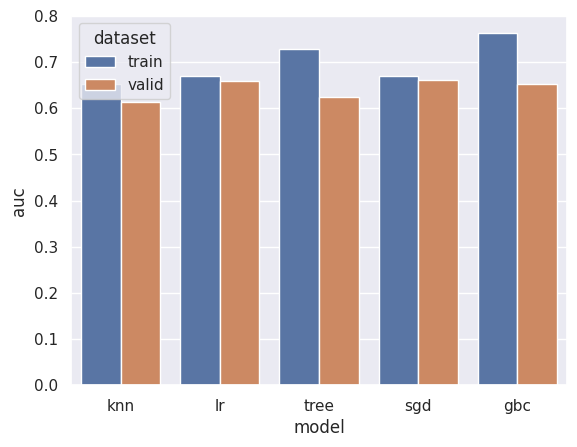

In [133]:
sns.barplot(data= data, x = 'model', y = 'auc', hue = 'dataset')

We observe that GBC has the highest AUC in the training dataset (as expected) however this metrics decay in the validation dataset. As we have used only default values for hyperparameters, we can look deeper in the importance of the features used. This can be done in simple models such logistic regression:

In [142]:
feature_importance =pd.DataFrame(lr.coef_[0],
                                 index = working_columns,
                                 columns = ['importance']).sort_values('importance', ascending = False)

In [147]:
feature_importance['feature'] = feature_importance.index

Text(0.5, 1.0, 'Logistic regression - Feature importance - top 20')

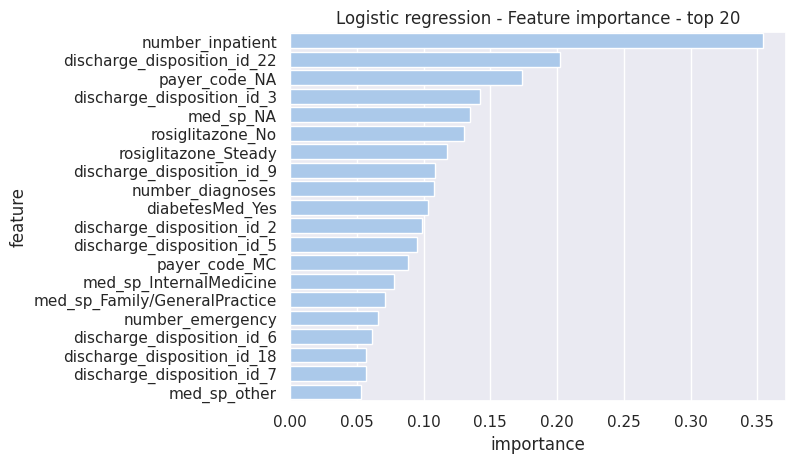

In [159]:
sns.set_color_codes('pastel')
sns.barplot(feature_importance.head(20), x= 'importance', y = 'feature', orient = 'h', color = 'b')
plt.title('Logistic regression - Feature importance - top 20')

The number_impatient is the most relevant in this model, which can be undertood that depending on the impatient visits in the last year, it is probable that the patient is going to be readmitted in less than 30 days.

Text(0.5, 1.0, 'Logistic regression - Feature importance - last 20')

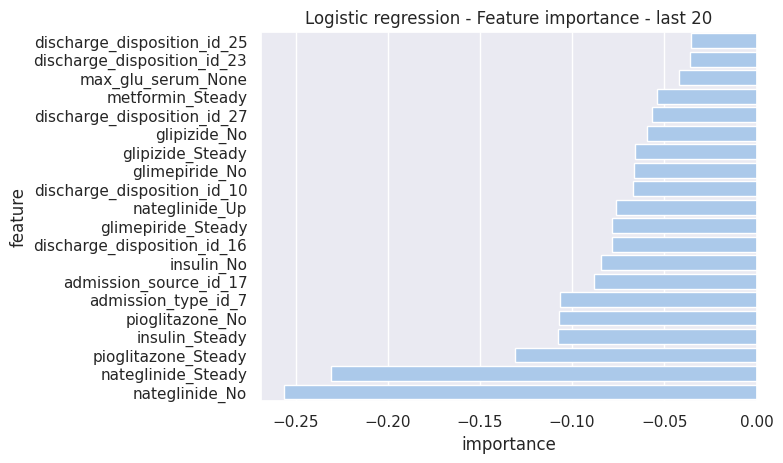

In [163]:
sns.barplot(feature_importance.tail(20), x= 'importance', y = 'feature', orient = 'h', color = 'b')
plt.title('Logistic regression - Feature importance - last 20')

We select the stocastic gradient descent model based on the higher AUC in the validation dataset.

In [165]:
X_test = diabetes_test[working_columns].values
y_test = diabetes_test['label'].values

scaler = pickle.load(open('scaler.sav', 'rb'))
X_test_sc = scaler.transform(X_test)

In [167]:
y_train_pred = sgd.predict_proba(X_train_sc)[:,1]
y_valid_pred = sgd.predict_proba(X_valid_sc)[:,1]
y_test_pred = sgd.predict_proba(X_test_sc)[:,1]

In [168]:
sgd_train_auc, sgd_train_accuracy, sgd_train_recall, sgd_train_precision, sgd_train_specificity = report(y_train, y_train_pred, threshold)
sgd_valid_auc, sgd_valid_accuracy, sgd_valid_recall, sgd_valid_precision, sgd_valid_specificity = report(y_valid, y_valid_pred, threshold)
sgd_test_auc, sgd_test_accuracy, sgd_test_recall, sgd_test_precision, sgd_test_specificity = report(y_test, y_test_pred, threshold)

AUC: 0.669
accuracy: 0.620
recall: 0.550
precision: 0.639
specificity: 0.689
AUC: 0.661
accuracy: 0.681
recall: 0.534
precision: 0.191
specificity: 0.701
AUC: 0.651
accuracy: 0.661
recall: 0.517
precision: 0.174
specificity: 0.680


Text(0.5, 1.0, 'ROC curve for train, validation and test dataset using SGD')

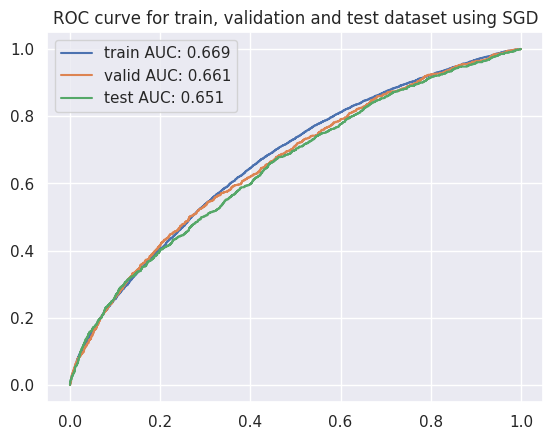

In [180]:
fpr_train, tpr_train, _ = metrics.roc_curve(y_train, y_train_pred)
fpr_valid, tpr_valid, _ = metrics.roc_curve(y_valid, y_valid_pred)
fpr_test, tpr_test, _ = metrics.roc_curve(y_test, y_test_pred)

plt.plot(fpr_train, tpr_train, label = 'train AUC: 0.669')
plt.plot(fpr_valid, tpr_valid, label = 'valid AUC: 0.661')
plt.plot(fpr_test, tpr_test, label = 'test AUC: 0.651')
plt.legend()
plt.title('ROC curve for train, validation and test dataset using SGD')

**Final considerations**

We have created machine learning models to predict whether a patient with diabetes is going to be readmitted in less than 30 days. Five models were shown as a way to compare performance between then, from the simplest KNN model to the gradient boosting classifier. Indeed, some analysis were left behind such as the addition/reduction of more features, the degree of bias/variance in the dataset and the use of hyperparameter tuning of the models. Finally, based on performance of AUC in the validation dataset, the Schocastic Gradient Descent (SGD) was choosen, and even though we have worked with the default hyperparameters, we got a working model.